In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test)= mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000,)


In [2]:
img_rows=x_train[0].shape[0] 
img_cols=x_train[1].shape[0]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /=255
x_test /=255


print(x_train.shape)
print(x_test.shape[0])
print(x_train.shape[0])

(60000, 28, 28, 1)
10000
60000


In [3]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


print("Number of classes: ", str(y_test.shape[1]))

Number of classes:  10


In [4]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)


In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation= 'relu', input_shape=input_shape))

model.add(Conv2D(64, kernel_size=(2,2),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(.50))

model.add(Dense(num_classes, activation='softmax'))



model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [13]:
batch_size =32
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score= model.evaluate(x_test,y_test, verbose=0)
print("Test Loss: ",score[0])
print("Test Accuracy: ", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 40s 671us/step - loss: 0.3089 - accuracy: 0.9062 - val_loss: 0.1547 - val_accuracy: 0.9524
Epoch 2/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.2589 - accuracy: 0.9232 - val_loss: 0.1316 - val_accuracy: 0.9593
Epoch 3/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.2281 - accuracy: 0.9319 - val_loss: 0.1241 - val_accuracy: 0.9637
Epoch 4/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.2020 - accuracy: 0.9390 - val_loss: 0.1047 - val_accuracy: 0.9699
Epoch 5/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.1783 - accuracy: 0.9467 - val_loss: 0.0922 - val_accuracy: 0.9711
Epoch 6/10
60000/60000 [==============================] - 41s 690us/step - loss: 0.1597 - accuracy: 0.9529 - val_loss: 0.0791 - val_accuracy: 0.9759
Epoch 7/10
60000/60000 [==============================] 

C:/Users/mosto/REPOSITORY/CNN/


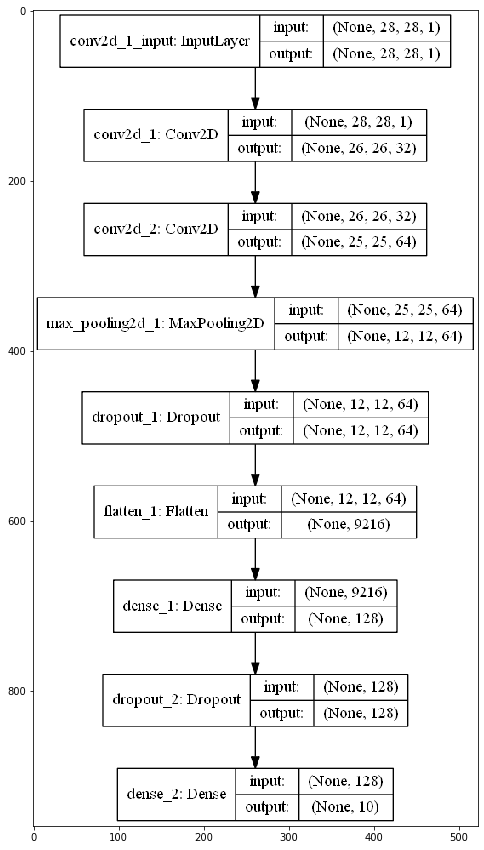

In [14]:
%matplotlib inline
import os
import pydot
# import graphviz
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras import backend as K

model_diagrams_path = 'C:/Users/mosto/REPOSITORY/CNN/'
print(model_diagrams_path)

plot_model(model, to_file = model_diagrams_path + 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread(model_diagrams_path + 'model_plot.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img)

In [11]:

import os
# print("This file path, relative to os.getcwd()")
print(os.getcwd())

C:\Users\mosto\REPOSITORY\CNN


10
10
range(1, 11)


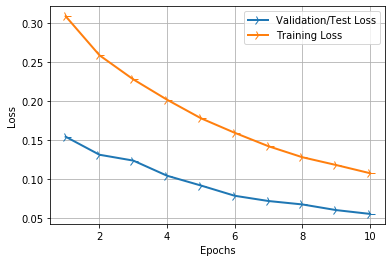

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
print(len(loss_values))
print(len(val_loss_values))

epochs = range(1, len(loss_values)+1)
print(epochs)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker= '4', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
model.save('C:/Users/mosto/REPOSITORY/CNN/First_mnist.h5')


In [ ]:
from keras.models import load_model
classifier = load_model('C:/Users/mosto/REPOSITORY/CNN/First_mnist.h5')

In [6]:
import cv2
import numpy as np
from keras.models import load_model
classifier = load_model('C:/Users/mosto/REPOSITORY/CNN/First_mnist.h5')

def draw_test(name, pred, input_im):
    BLACK= [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    expanded_image= cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    
for i in range(0,10):
    rand=np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    res= str(classifier.predict_classes(input_im, 1, verbose=0)[0])
    
    
#     if Display:
    draw_test("Prediction",res,imageL)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import cv2
import numpy as np
from keras.models import load_model
classifier = load_model('C:/Users/mosto/REPOSITORY/CNN/First_mnist.h5')

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()